# Section 1. Introduction to the problem/task and dataset

The chosen dataset for this machine project is the [FIFA Players Dataset](https://www.kaggle.com/datasets/maso0dahmed/football-players-data). The original dataset contains a total of 17954 rows and 51 features. The features contain identifying data (eg. name, birth_data), performance metrics (eg. overall_rating, freekick_accuracy) and other player-related statistics (eg. balance, agression, stamina). The dataset was created and sourced by Masood Ahmed and Talha Turab and is free to use in Kaggle. The data was scraped by the authors from [SoFIFA.com](https://sofifa.com/), a FIFA player statistic site spanning the various FIFA games.

The models aim to predict a players overall rating given relevant features. Therefore, this problem classifies as a regression task. 

# Section 2. Description of the dataset

The dataset only includes one csv file. Each of the \~18k rows in the dataset represents a FIFA Player. Their 51 columns represent the dataset features. These features include (feature descriptions sourced from the dataset authors, see [here](https://www.kaggle.com/datasets/maso0dahmed/football-players-data/data#:~:text=and%20career%20progressions.-,Features%3A,-name%3A%20Name%20of):

## Features

- **name**: Name of the player.
- **full_name**: Full name of the player.
- **birth_date**: Date of birth of the player.
- **age**: Age of the player.
- **height_cm**: Player's height in centimeters.
- **weight_kgs**: Player's weight in kilograms.
- **positions**: Positions the player can play.
- **nationality**: Player's nationality.
- **overall_rating**: Overall rating of the player in FIFA.
- **potential**: Potential rating of the player in FIFA.
- **value_euro**: Market value of the player in euros.
- **wage_euro**: Weekly wage of the player in euros.
- **preferred_foot**: Player's preferred foot.
- **international_reputation**(1-5): International reputation rating from 1 to 5.
- **weak_foot**(1-5): Rating of the player's weaker foot from 1 to 5.
- **skill_moves**(1-5): Skill moves rating from 1 to 5.
- **body_type**: Player's body type.
- **release_clause_euro**: Release clause of the player in euros.
- **national_team**: National team of the player.
- **national_rating**: Rating in the national team.
- **national_team_position**: Position in the national team.
- **national_jersey_number**: Jersey number in the national team.
- **crossing**: Rating for crossing ability.
- **finishing**: Rating for finishing ability.
- **heading_accuracy**: Rating for heading accuracy.
- **short_passing**: Rating for short passing ability.
- **volleys**: Rating for volleys.
- **dribbling**: Rating for dribbling.
- **curve**: Rating for curve shots.
- **freekick_accuracy**: Rating for free kick accuracy.
- **long_passing**: Rating for long passing.
- **ball_control**: Rating for ball control.
- **acceleration**: Rating for acceleration.
- **sprint_speed**: Rating for sprint speed.
- **agility**: Rating for agility.
- **reactions**: Rating for reactions.
- **balance**: Rating for balance.
- **shot_power**: Rating for shot power.
- **jumping**: Rating for jumping.
- **stamina**: Rating for stamina.
- **strength**: Rating for strength.
- **long_shots**: Rating for long shots.
- **aggression**: Rating for aggression.
- **interceptions**: Rating for interceptions.
- **positioning**: Rating for positioning.
- **vision**: Rating for vision.
- **penalties**: Rating for penalties.
- **composure**: Rating for composure.
- **marking**: Rating for marking.
- **standing_tackle**: Rating for standing tackle.
- **sliding_tackle**: Rating for sliding tackle.




# Section 3. List of requirements

All these libraries serve specific purposes and are commonly used when working with statistics and machine learning projects. Pandas for example allows us to transform data into Dataframe and Series data structures and lets us manipulate the data within really easily. Matplotlib and Seaborn are excellent graphing libraries while Scikit-learn lets us easily train and imrpove AI and machine learning models.

## List of external python libraries
1. Pandas
2. Numpy
3. Matplotlib
4. Seaborn
5. Scikit-learn

# Section 4. Data preprocessing and cleaning

## 4a. Importing all relevant libraries

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, QuantileTransformer, StandardScaler
import itertools
from collections import Counter

## 4b. Brief overview of the dataset

In [95]:
df = pd.DataFrame()
df = pd.read_csv("./fifa_players.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17708 non-null  float64
 12  preferred_foot                 17954 non-null 

In [96]:
df.head(3)

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67


See aggregate metrics of the features. 

In [97]:
df.describe()

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
count,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,1.769900e+04,17708.000000,17954.000000,17954.000000,17954.000000,...,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000
mean,25.565445,174.946921,75.301047,66.240169,71.430935,2.479280e+06,9902.134628,1.111674,2.945695,2.361034,...,46.852456,55.816531,46.657959,49.857302,53.406260,48.357302,58.680183,47.162861,47.733040,45.705915
std,4.705708,14.029449,7.083684,6.963730,6.131339,5.687014e+06,21995.593750,0.392168,0.663691,0.763223,...,19.429337,17.394047,20.754649,19.694311,14.156038,15.810844,11.625541,20.037346,21.674973,21.285812
min,17.000000,152.400000,49.900000,47.000000,48.000000,1.000000e+04,1000.000000,1.000000,1.000000,1.000000,...,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,12.000000,3.000000,2.000000,3.000000
25%,22.000000,154.940000,69.900000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,...,32.000000,44.000000,26.000000,38.000000,44.000000,38.000000,51.000000,30.000000,27.000000,24.000000
50%,25.000000,175.260000,74.800000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,2.000000,...,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,52.500000,55.000000,52.000000
75%,29.000000,185.420000,79.800000,71.000000,75.000000,2.100000e+06,9000.000000,1.000000,3.000000,3.000000,...,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,46.000000,205.740000,110.200000,94.000000,95.000000,1.105000e+08,565000.000000,5.000000,5.000000,5.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,90.000000


## 4c. Cleaning the dataset

First, drop the `potential` column. This is because the goal of the model is to predict a new rating and compare how accurate it is to the `overall_rating`. Since the potential rating of a player is almost 1:1 correlated with this output, the group decided not to use the feature and instead predict only based on other features like skill-related features, etc.

In [98]:
df= df.drop('potential', axis=1)

Checking for null and missing values in our dataset.

In [99]:
df.isnull().sum()

name                                 0
full_name                            0
birth_date                           0
age                                  0
height_cm                            0
weight_kgs                           0
positions                            0
nationality                          0
overall_rating                       0
value_euro                         255
wage_euro                          246
preferred_foot                       0
international_reputation(1-5)        0
weak_foot(1-5)                       0
skill_moves(1-5)                     0
body_type                            0
release_clause_euro               1837
national_team                    17097
national_rating                  17097
national_team_position           17097
national_jersey_number           17097
crossing                             0
finishing                            0
heading_accuracy                     0
short_passing                        0
volleys                  

To clean the dataset, drop all duplicate values using `drop_duplicates` then columns with high null values with `drop_na`. Additionally, drop columns that act as unique identifiers for rows since they will not help the models' training. Since there are a few rows with null `value_euro` or `wage_euro`, these rows will also be dropped.

In [100]:
old_length = len(df)

# Drop duplicates
df = df.drop_duplicates(keep='first', inplace=False)

# Drop rows with null 'value_euro' or 'wage_euro'
df = df.dropna(subset=["value_euro", "wage_euro"])

# Drop columns with high null values
df = df.drop(columns=["release_clause_euro", "national_team", "national_rating", "national_team_position", "national_jersey_number"])

# Drop identifier columns
df = df.drop(columns=['name', 'full_name', 'birth_date'])

# Reset index to adjust the row indices
df = df.reset_index(drop=True)

new_length = len(df)

# Show how many rows were dropped
str(old_length - new_length) + " rows were dropped"


'255 rows were dropped'

## 4d. Invalid rows

Features that should have values in range of 0 to 100 will be checked for any invalid data. They will be stored in the `skill_100` dataframe.

In [101]:
skill_100 = df[['acceleration', 'jumping', 'aggression', 'dribbling', 'short_passing', 'positioning', 'reactions', 'overall_rating', 'long_shots', 'freekick_accuracy', 'volleys', 'vision', 'crossing', 'curve', 'agility', 'finishing', 'heading_accuracy', 'standing_tackle', 'marking', 'stamina', 'penalties', 'balance', 'strength', 'ball_control', 'interceptions', 'long_passing', 'composure', 'sliding_tackle', 'shot_power', 'sprint_speed']]
skill_100.head(3)

,acceleration,jumping,aggression,dribbling,short_passing,positioning,reactions,overall_rating,long_shots,freekick_accuracy,...,penalties,balance,strength,ball_control,interceptions,long_passing,composure,sliding_tackle,shot_power,sprint_speed
0,91,68,48,97,92,94,95,94,94,94,...,75,95,66,96,22,89,96,26,85,86
1,76,50,46,84,91,84,88,88,89,87,...,67,81,58,91,56,89,88,22,84,73
2,71,83,78,87,86,82,82,88,82,82,...,82,66,87,90,64,90,87,67,90,79


As seen, these features are all well within their 0-100 range, meaning there is no need to prune any invalid data.

In [102]:
invalid_rows = skill_100[(skill_100 < 1).any(axis=1) | (skill_100 > 100).any(axis=1)]

print("Number of invalid rows:", len(invalid_rows))

Number of invalid rows: 0


Next, all columns with values whose ranges are not limited to 0-100 will stored in `not_skill`.

In [103]:
not_skill = df.drop(columns=skill_100.columns)
not_skill.columns

Index(['age', 'height_cm', 'weight_kgs', 'positions', 'nationality',
       'value_euro', 'wage_euro', 'preferred_foot',
       'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)',
       'body_type'],
      dtype='object')

`not_skill` will be separated into two dataframes containing continuous and categorical data.

In [104]:
not_skill_int = not_skill[['age', 'height_cm', 'weight_kgs', 'value_euro', 'wage_euro']]
not_skill_cat = not_skill.drop(columns=not_skill_int.columns)

In [105]:
# gets outliers outside the percentile range of a certain column
def get_outliers(col, percentile):
    alpha = 1 - percentile
    percentile_5 = df[col].quantile(alpha / 2)
    percentile_95 = df[col].quantile(1 - (alpha/2))
    
    in_range = df[col][(df[col] >= percentile_5) & (df[col] <= percentile_95)]
    outliers = df[col][(df[col] <= percentile_5) | (df[col] >= percentile_95)]
    print(f"Column: {col}, Outliers: {len(outliers)}, Inlier Range: {percentile_5} - {percentile_95}, Value Range: {df[col].min()} - {df[col].max()}")

See outliers and their ranges for continious columns in `not_skill_int`.

In [106]:
for col in not_skill_int.columns:
    get_outliers(col, 0.95)

Column: age, Outliers: 1388, Inlier Range: 18.0 - 35.0, Value Range: 17 - 46
Column: height_cm, Outliers: 3506, Inlier Range: 152.4 - 193.04, Value Range: 152.4 - 205.74
Column: weight_kgs, Outliers: 993, Inlier Range: 62.1 - 89.8, Value Range: 49.9 - 110.2
Column: value_euro, Outliers: 985, Inlier Range: 70000.0 - 15500000.0, Value Range: 10000.0 - 110500000.0
Column: wage_euro, Outliers: 5292, Inlier Range: 1000.0 - 58000.0, Value Range: 1000.0 - 565000.0


The maximum and minimum values for these features aren't human errors, so we will not be removing any outliers and will rely on normalization instead.

Columns in the not_skill_cat dataframe are as follows:

In [107]:
not_skill_cat.columns

Index(['positions', 'nationality', 'preferred_foot',
       'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)',
       'body_type'],
      dtype='object')

First, for `body_type` we check to see if there are any values with too little rows in the dataset.

In [108]:
not_skill_cat.body_type.value_counts()

body_type
Normal                 10223
Lean                    6400
Stocky                  1069
Messi                      1
Courtois                   1
PLAYER_BODY_TYPE_25        1
Akinfenwa                  1
Shaqiri                    1
Neymar                     1
C. Ronaldo                 1
Name: count, dtype: int64

Rows containing these values will be dropped.

In [109]:
df = df[df['body_type'].isin(["Normal", "Lean", "Stocky"])]

## 4e. Feature Transformation

Look through dataset for multiple representations and to understand the values better

In [110]:
import os

os.makedirs('dumps', exist_ok=True)

# Open the text file in write mode with utf-8 encoding
with open('dumps/unique_values.txt', 'w', encoding='utf-8') as file:
    for column in df.columns:
        # print(column + " column is being written")
        values = sorted(df[column].unique())
        file.write("Column: " + column + "\n")
        file.write("Unique Values = " + ", ".join(map(str, values)) + "\n")
        file.write(str(len(values)) + " unique values\n\n")
        # print(column + " has been written")
print("Data exported to 'dumps/unique_values.txt'")


Data exported to 'dumps/unique_values.txt'


### Encoding

Data will be binned using the `nationality` column and group rows by their continent. This is since some countries only have a very few amount of rows associated with them, which may introduce imbalance to the dataset.

In [111]:
country_to_continent = {
    'Afghanistan': 'Asia', 'Albania': 'Europe', 'Algeria': 'Africa', 'Andorra': 'Europe', 'Angola': 'Africa', 'Antigua & Barbuda': 'North America', 'Argentina': 'South America', 'Armenia': 'Asia', 'Australia': 'Oceania', 'Austria': 'Europe', 'Azerbaijan': 'Asia', 'Barbados': 'North America', 'Belarus': 'Europe', 'Belgium': 'Europe', 'Benin': 'Africa', 'Bermuda': 'North America', 'Bolivia': 'South America', 'Bosnia Herzegovina': 'Europe', 'Brazil': 'South America', 'Bulgaria': 'Europe', 'Burkina Faso': 'Africa', 'Burundi': 'Africa', 'Cameroon': 'Africa', 'Canada': 'North America', 'Cape Verde': 'Africa', 'Central African Rep.': 'Africa', 'Chad': 'Africa', 'Chile': 'South America', 'China PR': 'Asia', 'Colombia': 'South America', 'Comoros': 'Africa', 'Congo': 'Africa', 'Costa Rica': 'North America', 'Croatia': 'Europe', 'Cuba': 'North America', 'Curacao': 'North America', 'Cyprus': 'Europe', 'Czech Republic': 'Europe', 'DR Congo': 'Africa', 'Denmark': 'Europe', 'Dominican Republic': 'North America', 'Ecuador': 'South America', 'Egypt': 'Africa', 'El Salvador': 'North America', 'England': 'Europe', 'Equatorial Guinea': 'Africa', 'Eritrea': 'Africa', 'Estonia': 'Europe', 'Ethiopia': 'Africa', 'FYR Macedonia': 'Europe', 'Faroe Islands': 'Europe', 'Fiji': 'Oceania', 'Finland': 'Europe', 'France': 'Europe', 'Gabon': 'Africa', 'Gambia': 'Africa', 'Georgia': 'Asia', 'Germany': 'Europe', 'Ghana': 'Africa', 'Greece': 'Europe', 'Grenada': 'North America', 'Guam': 'Oceania', 'Guatemala': 'North America', 'Guinea': 'Africa', 'Guinea Bissau': 'Africa', 'Guyana': 'South America', 'Haiti': 'North America', 'Honduras': 'North America', 'Hong Kong': 'Asia', 'Hungary': 'Europe', 'Iceland': 'Europe', 'Indonesia': 'Asia', 'Iran': 'Asia', 'Iraq': 'Asia', 'Israel': 'Asia', 'Italy': 'Europe', 'Ivory Coast': 'Africa', 'Jamaica': 'North America', 'Japan': 'Asia', 'Jordan': 'Asia', 'Kazakhstan': 'Asia', 'Kenya': 'Africa', 'Korea DPR': 'Asia', 'Korea Republic': 'Asia', 'Kosovo': 'Europe', 'Kuwait': 'Asia', 'Latvia': 'Europe', 'Liberia': 'Africa', 'Libya': 'Africa', 'Liechtenstein': 'Europe', 'Lithuania': 'Europe', 'Luxembourg': 'Europe', 'Madagascar': 'Africa', 'Mali': 'Africa', 'Malta': 'Europe', 'Mauritania': 'Africa', 'Mexico': 'North America', 'Moldova': 'Europe', 'Montenegro': 'Europe', 'Montserrat': 'North America', 'Morocco': 'Africa', 'Mozambique': 'Africa', 'Namibia': 'Africa', 'Netherlands': 'Europe', 'New Caledonia': 'Oceania', 'New Zealand': 'Oceania', 'Nicaragua': 'North America', 'Nigeria': 'Africa', 'Northern Ireland': 'Europe', 'Norway': 'Europe', 'Oman': 'Asia', 'Palestine': 'Asia', 'Panama': 'North America', 'Papua New Guinea': 'Oceania', 'Paraguay': 'South America', 'Peru': 'South America', 'Philippines': 'Asia', 'Poland': 'Europe', 'Portugal': 'Europe', 'Republic of Ireland': 'Europe', 'Romania': 'Europe', 'Russia': 'Europe', 'Rwanda': 'Africa', 'Saudi Arabia': 'Asia', 'Scotland': 'Europe', 'Senegal': 'Africa', 'Serbia': 'Europe', 'Sierra Leone': 'Africa', 'Slovakia': 'Europe', 'Slovenia': 'Europe', 'South Africa': 'Africa', 'South Sudan': 'Africa', 'Spain': 'Europe', 'St Kitts Nevis': 'North America', 'St Lucia': 'North America', 'Sudan': 'Africa', 'Suriname': 'South America', 'Sweden': 'Europe', 'Switzerland': 'Europe', 'Syria': 'Asia', 'São Tomé & Príncipe': 'Africa', 'Tanzania': 'Africa', 'Thailand': 'Asia', 'Togo': 'Africa', 'Trinidad & Tobago': 'North America', 'Tunisia': 'Africa', 'Turkey': 'Asia', 'Uganda': 'Africa', 'Ukraine': 'Europe', 'United Arab Emirates': 'Asia', 'United States': 'North America', 'Uruguay': 'South America', 'Uzbekistan': 'Asia', 'Venezuela': 'South America', 'Vietnam': 'Asia', 'Wales': 'Europe', 'Yemen': 'Asia', 'Zambia': 'Africa', 'Zimbabwe': 'Africa'
}


# Map each nationality to its continent
df['continent'] = df['nationality'].map(country_to_continent)

# Check the result
df = df.drop('nationality', axis=1)

Next, one-hot-encoding will be performed on the player positions. There are 15 total positions in the one-hot-vector.

In [112]:
positions_split = df['positions'].str.get_dummies(sep=',')
positions_split.head(3)

,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


Combine these columns with the dataframe and get rid of the `positions` column.

In [113]:
df = pd.concat([df, positions_split], axis=1)
df = df.drop(columns=['positions'])

In [114]:
df.columns

Index(['age', 'height_cm', 'weight_kgs', 'overall_rating', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle',
       'continent', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LB', 'LM', 'LW',
       'LWB', 'RB', 'RM', 'RW', 'RWB', 'ST'],
      dtype='object')

In [115]:
df['continent'].value_counts()

continent
Europe           10401
South America     3038
Asia              1916
Africa            1175
North America      892
Oceania            270
Name: count, dtype: int64

Continents will be label encoded to make them easier to work with for the models.

Continents:  
> 0 - Africa  
1 - Asia  
2 - Europe  
3 - North America  
4 - Oceania  
5 - South America

In [116]:
labels = df['continent'].unique()

In [117]:
le = LabelEncoder()
le.fit(labels)
df["continent"] = le.transform(df["continent"])

See transformed `continent` rows.

In [118]:
df['continent'].value_counts()

continent
2    10401
5     3038
1     1916
0     1175
3      892
4      270
Name: count, dtype: int64

Body types will be label encoded as well.

In [119]:
labels = df['body_type'].unique()

In [120]:
le.fit(labels)
df['body_type'] = le.transform(df["body_type"])

In [121]:
df['body_type'].value_counts()

body_type
1    10223
0     6400
2     1069
Name: count, dtype: int64

Lastly,the same will be done with preferred foot (left, right).

In [122]:
labels = df['preferred_foot'].unique()
le.fit(labels)
df['preferred_foot'] = le.transform(df["preferred_foot"])
df['preferred_foot'].value_counts()

preferred_foot
1    13576
0     4116
Name: count, dtype: int64

### Removing highly correlated features

Highly correlated features will be removed. First we will drop our y, `overall_rating`.

In [123]:
X = df
X = df.drop('overall_rating', axis=1)
y = df['overall_rating']

To remove the correlated features, we set our threshhold to be 0.7, where correlations above 0.7 will be dropped. We will first be getting the two most correlated features and comparing both features' correlations with other features in the dataset excluding themselves. The feature with the higher average correlation will be dropped. This continues until there are no more correlations between two features higher than the threshold.

In [124]:
# threshhold for correlaton
thresh = 0.7
fcorr = 1

# if highest correlation between features is less than threshold, break.
while fcorr >= thresh:
    # unstack correlation matrix
    X_corr = X.corr().abs()
    uns = X_corr.unstack().reset_index()
    
    # drop duplicates and identity rows, as well as sort by highest
    uns.drop_duplicates(inplace=True)
    uns.sort_values(0, inplace=True, ascending=False)
    # uns = uns[uns['level_0'] != uns['level_1']]
    uns = uns[uns[0] != 1.0]
    
    # unpack feature 1, feature 2 and corr
    f1, f2, fcorr = uns.iloc[0][:]

    # stop looping if fcorr is lower than threshhold
    if fcorr < thresh:
        break

    # drop f1, f2 from correlations
    f1_corr = pd.DataFrame(X_corr[f1]).drop([f1, f2])
    f2_corr = pd.DataFrame(X_corr[f2]).drop([f1, f2])

    # mean of other correlated features > threshhold
    # f1_s = f1_corr[f1_corr[f1] > thresh].mean().iloc[0]
    # f2_s = f2_corr[f2_corr[f2] > thresh].mean().iloc[0]

    # number of other correlated features > thresh
    # f1_s = len(f1_corr[f1_corr[f1] > thresh])
    # f2_s = len(f2_corr[f2_corr[f2] > thresh])

    # mean of all other correlated features
    f1_s = f1_corr.mean().iloc[0]
    f2_s = f2_corr.mean().iloc[0]

    # drop feature with highest metric
    if f1_s > f2_s:
        X.drop(columns=[f1], inplace=True)
        print(f'Dropping {f1} ({f1_s:.3f}) over {f2} ({f2_s:.3f})')
    else:
        X.drop(columns=[f2], inplace=True)
        print(f'Dropping {f2} ({f2_s:.3f}) over {f1} ({f1_s:.3f})')

Dropping standing_tackle (0.268) over sliding_tackle (0.256)
Dropping ball_control (0.444) over dribbling (0.437)
Dropping interceptions (0.258) over sliding_tackle (0.240)
Dropping acceleration (0.345) over sprint_speed (0.333)
Dropping marking (0.251) over sliding_tackle (0.227)
Dropping dribbling (0.425) over positioning (0.407)
Dropping short_passing (0.396) over long_passing (0.358)
Dropping long_shots (0.386) over shot_power (0.373)
Dropping positioning (0.379) over finishing (0.354)
Dropping volleys (0.347) over finishing (0.342)
Dropping curve (0.356) over freekick_accuracy (0.330)
Dropping value_euro (0.153) over wage_euro (0.141)
Dropping finishing (0.321) over penalties (0.310)
Dropping shot_power (0.320) over penalties (0.298)
Dropping GK (0.284) over heading_accuracy (0.239)
Dropping agility (0.290) over balance (0.262)
Dropping crossing (0.316) over freekick_accuracy (0.284)
Dropping freekick_accuracy (0.272) over penalties (0.258)
Dropping aggression (0.232) over sliding

All correations are below 0.7.

In [125]:
new_X = X.corr().abs().unstack().reset_index().sort_values(0, ascending=False)
new_X = new_X[new_X[0] != 1.0]
new_X

,level_0,level_1,0
602,penalties,skill_moves(1-5),0.695308
262,skill_moves(1-5),penalties,0.695308
641,composure,reactions,0.692606
403,reactions,composure,0.692606
567,vision,skill_moves(1-5),0.674937
...,...,...,...
240,weak_foot(1-5),RB,0.000476
734,continent,ST,0.000402
1210,ST,continent,0.000402
1088,RM,wage_euro,0.000385


In [126]:
print(f'TOTAL COLUMNS LEFT: {len(X.columns)}, COLUMNS DROPPED: {len(df.columns) - len(X.columns)}')

TOTAL COLUMNS LEFT: 35, COLUMNS DROPPED: 21


In [127]:
df = pd.concat([X, y], axis =1 )

In [128]:
print(df.columns)

Index(['age', 'height_cm', 'weight_kgs', 'wage_euro', 'preferred_foot',
       'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)',
       'body_type', 'heading_accuracy', 'sprint_speed', 'reactions', 'balance',
       'jumping', 'stamina', 'strength', 'vision', 'penalties', 'composure',
       'sliding_tackle', 'continent', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'LB',
       'LM', 'LW', 'LWB', 'RB', 'RM', 'RW', 'RWB', 'ST', 'overall_rating'],
      dtype='object')


### Split train/test data 

This is done to prevent data leakage as a result of the transformation and normalization algorithms below. The algorithms will have to be done to both test/train data independently.

In [129]:
from sklearn.model_selection import train_test_split

df_X = df.drop('overall_rating', axis=1)
df_y = df['overall_rating']

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

### Distribution

The distribution of `age`, `height_cm`, `weight_kgs`, `heading_accuracy`, `sprint_speed`, `balance`, `jumping`, `stamina`, `strength`, `vision`, `composure`, `sliding_tackle`, and `wage_euro` will be examined.

In [130]:
name = ['age', 'height_cm', 'weight_kgs', 'heading_accuracy', 'sprint_speed', 'balance', 'jumping', 'stamina', 'strength', 'vision', 'composure', 'sliding_tackle']

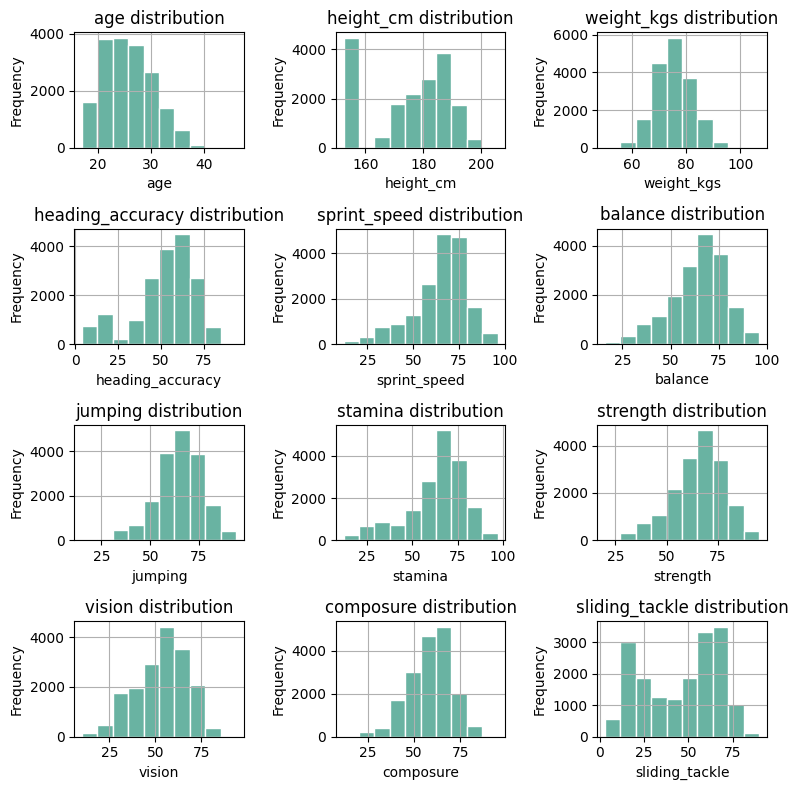

In [131]:
# Initialize a 4x3 charts
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(8, 8))

# Flatten the axes array (makes it easier to iterate over)
axes = axes.flatten()

# Loop through each column and plot a histogram
for i, column in enumerate(name):
    
    # Add the histogram
    df[column].hist(ax=axes[i], # Define on which ax we're working on
                    edgecolor='white', # Color of the border
                    color='#69b3a2' # Color of the bins
                   )
    
    # Add title and axis label
    axes[i].set_title(f'{column} distribution') 
    axes[i].set_xlabel(column) 
    axes[i].set_ylabel('Frequency') 

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## 4g. Normalization and Standardization

As shown from the distributions above, after performing a quantile transformation for the features in `name`, most features have now become normally distributed. However, for features such as `height_cm`, the distribution after transforming isn't a perfect normal distribution mainly due to the fact that a majority of the data is in the left side of the distribution. 

### MinMax Scaling

A MinMax sclaer will be used in order to set the data from 0-1 

In [132]:
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()

X_train[X_train.columns] = scaler.fit_transform(X_train)
X_test[X_test.columns] = scaler.fit_transform(X_test)



As the features in the dataset are now all normalized to the same range, models like KNN and Linear Regression can now be done more accurately.  
Just to check, here is the correlations matrix between all data after transformations and scaling.

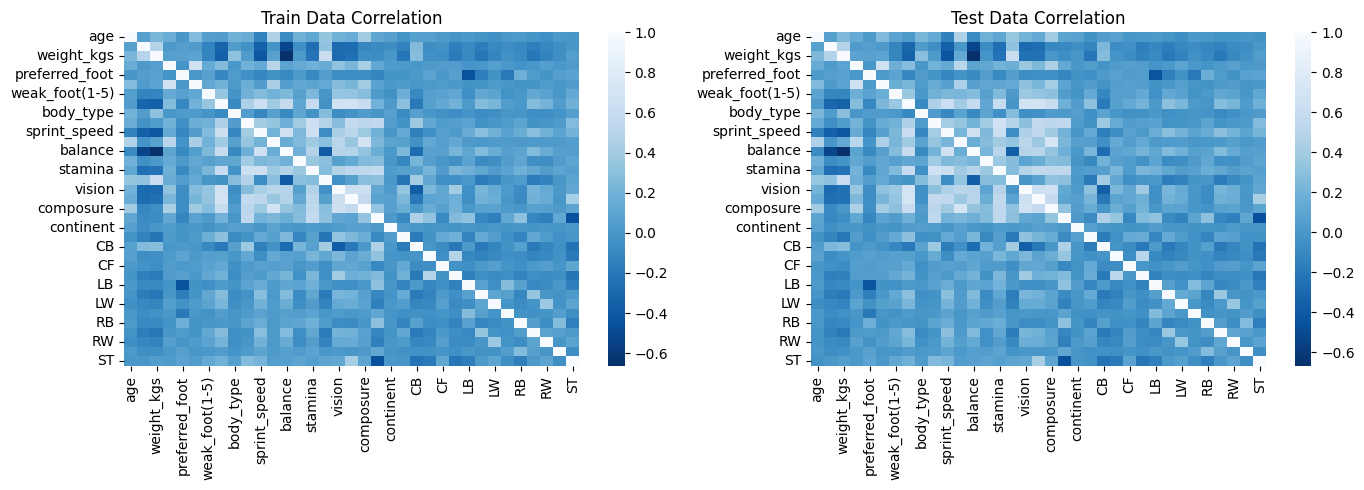

In [133]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
axes = axes.flatten()

axes[0].set_title('Train Data Correlation')
axes[1].set_title('Test Data Correlation')

# Train Data Heatmap
correlation_matrix = pd.DataFrame(X_train, columns=X_train.columns).corr()
sns.heatmap(correlation_matrix, fmt=".3f", ax=axes[0], cmap="Blues_r", cbar=True)

# Test Data Heatmap
correlation_matrix = pd.DataFrame(X_test, columns=X_test.columns).corr()
sns.heatmap(correlation_matrix, fmt=".3f", ax=axes[1], cmap="Blues_r", cbar=True)

plt.tight_layout()
plt.show()


# Section 5. Model 1: K-Nearest Neighbors

The KNN Algorithm is a supervised learning algorithm that memorizes the entire dataset and uses it to predict new data. It chooses the K closest instances and gets their average values to predict the new instance (regression). This ML algorithm is considered more 'stupid' than stronger algorithms due to its simplicity, but it is still capable of getting good predictions given a normalized dataset. The rationale for picking this algorithm is the thought "If a player has X rating, a player with similar stats should have around the same rating." 

## 5a. Initial Training

Importing relevant libraries

In [134]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

Copy as to not modify the original training and test sets

In [135]:
X_train_knn = X_train.copy()
X_test_knn = X_test.copy()
y_train_knn = y_train.copy()
y_test_knn = y_test.copy()

Setup KNN Classifier and start fitting to the training data. For now, choose as arbitrary K value that does not overfit the data.

In [136]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train_knn, y_train_knn)

KNeighborsRegressor(n_neighbors=10)

Test model on training data 

In [137]:
y_pred_train = knn.predict(X_train_knn)
score = knn.score(X_train_knn, y_train_knn)
print("Training set R^2 value:", score)

Training set R^2 value: 0.7709477482598487


The model got a "decent" accuracy on training data, now check using `MSE` ans `RMSE` loss functions

In [138]:
mse = mean_squared_error(y_train_knn, y_pred_train)
rmse = root_mean_squared_error(y_train_knn, y_pred_train)

print("MSE:", mse, "\nRMSE:", rmse)

MSE: 11.05114110082668 
RMSE: 3.324325661066719


Now, test on the test data

In [139]:
y_pred_test = knn.predict(X_test_knn)
score = knn.score(X_test_knn, y_test_knn)
print("Training set R^2 value:", score)

Training set R^2 value: 0.7101786753007258


The model achieved a similar R^2 value on testing data, this means no overfitting or underfitting is occuring. Now check the loss.

In [140]:
mse = mean_squared_error(y_test_knn, y_pred_test)
rmse = root_mean_squared_error(y_test_knn, y_pred_test)

print("MSE:", mse, "\nRMSE:", rmse)

MSE: 14.295272675897147 
RMSE: 3.780908974823005


## 5b. Error analysis

To recap, the model got an coefficient of determination of ~0.77 for the training set and ~0.71 for the testing set. While not too bad, it mayb be improved with selecting a better K value or distance metric. For now, it is more important to see which features are causing the MSE and RMSE values to spike.

In [141]:
# get squared error
losses = (y_train_knn - y_pred_train) ** 2

# 
indexes = losses.sort_values(ascending=False)[:2000]
high_err = X_train_knn[X_train_knn.index.isin(indexes.index)]
print(f"Highest Error rows: ({indexes.min()} - {indexes.max()})")

high_err.head(5)

Highest Error rows: (23.039999999999974 - 243.35999999999981)


,age,height_cm,weight_kgs,wage_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),body_type,heading_accuracy,...,CM,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
17443,0.379310,0.047619,0.523643,0.066079,1.0,0.25,0.50,0.50,1.0,0.466667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6734,0.103448,0.761905,0.492119,0.000000,1.0,0.00,0.50,0.50,0.0,0.555556,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6809,0.241379,0.000000,0.285464,0.000000,1.0,0.00,0.25,0.50,0.0,0.488889,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5977,0.724138,0.666667,0.667250,0.000000,1.0,0.00,0.25,0.00,1.0,0.266667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16275,0.482759,0.000000,0.332750,0.000000,1.0,0.00,0.50,0.25,0.5,0.511111,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
indexes = losses.sort_values(ascending=True)[:2000]
low_err = X_train_knn[X_train_knn.index.isin(indexes.index)]
print(f"Lowest Error rows: ({indexes.min()} - {indexes.max()})")

low_err.head(5)

Lowest Error rows: (0.0 - 0.25)


,age,height_cm,weight_kgs,wage_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),body_type,heading_accuracy,...,CM,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
12456,0.482759,0.571429,0.420315,0.004405,1.0,0.0,0.50,0.5,1.0,0.722222,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2246,0.413793,0.428571,0.388792,0.011013,1.0,0.0,0.50,0.5,0.0,0.555556,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13872,0.172414,0.666667,0.523643,0.006608,1.0,0.0,0.50,0.5,0.5,0.644444,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2721,0.103448,0.238095,0.285464,0.013216,1.0,0.0,0.75,0.5,0.0,0.511111,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13724,0.413793,0.428571,0.420315,0.008811,0.0,0.0,0.50,0.5,1.0,0.588889,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


See distributions of highest error data (in green blue) and lowest error data (in red). Each set has 2000 rows.

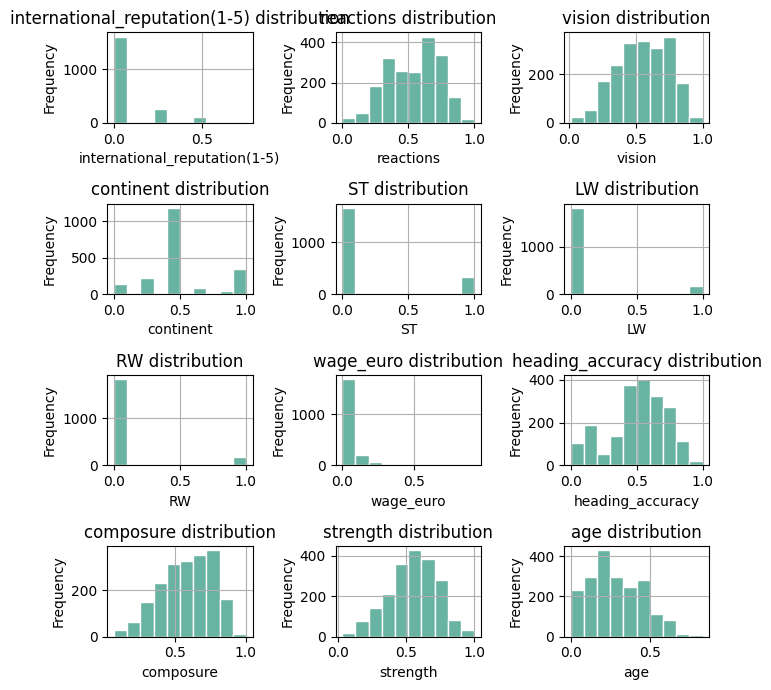

In [143]:
name = ['international_reputation(1-5)', 'reactions', 'vision', 'continent', 'ST', 'LW', 'RW', 'wage_euro', 'heading_accuracy', 'composure', 'strength', 'age']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(7, 7))
axes = axes.flatten()
for i, column in enumerate(name):
    high_err[column].hist(ax=axes[i], # Define on which ax we're working on
                    edgecolor='white', # Color of the border
                    color='#69b3a2' # Color of the bins
                   )
    axes[i].set_title(f'{column} distribution') 
    axes[i].set_xlabel(column) 
    axes[i].set_ylabel('Frequency') 
plt.tight_layout()
plt.show()

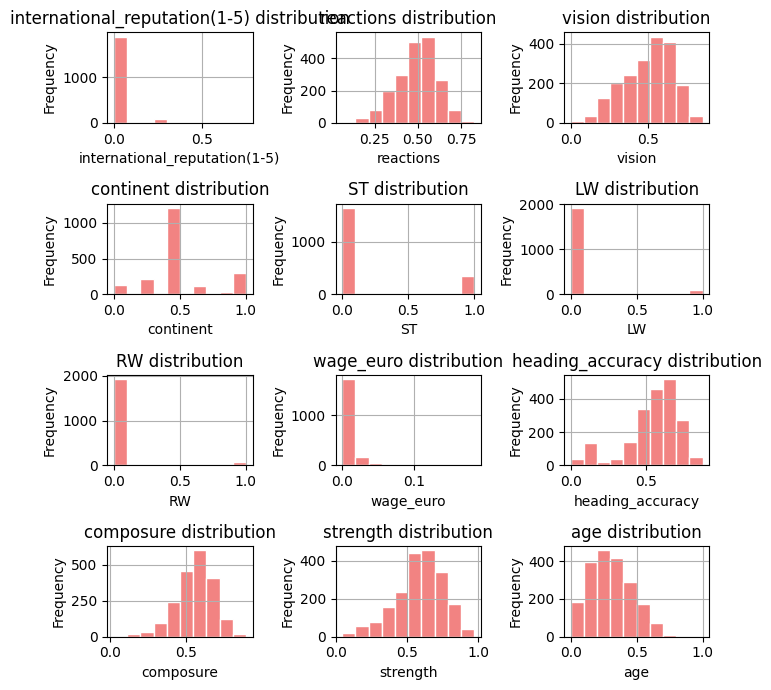

In [144]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(7, 7))
axes = axes.flatten()
for i, column in enumerate(name):
    low_err[column].hist(ax=axes[i], # Define on which ax we're working on
                    edgecolor='white', # Color of the border
                    color='#f28382' # Color of the bins
                   )
    axes[i].set_title(f'{column} distribution') 
    axes[i].set_xlabel(column) 
    axes[i].set_ylabel('Frequency') 
plt.tight_layout()
plt.show()

One thing that is obvious is that the rows that gave the lowest error are more normally distributed than those with high error. See `reactions`, `vision`, `composure`, `heading_accuracy` and `age`. This indicates that the model is predicting the values that are more average rather than those on either extreme. 



## 5c. Improving model performance

Perform a `GridSearchCV` on the model based on the training set to find out best parameters.

In [145]:
from sklearn.model_selection import GridSearchCV

# Define KNN model
optimal_knn = KNeighborsRegressor()

# Hyperparameter grid
param_grid = {
    'n_neighbors': [1, 5, 7, 10, 15, 20, 30, 50, 100, 500],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski', 'cosine']
}

# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=optimal_knn, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=5)

# Fit the model
grid_search.fit(X_train_knn, y_train_knn)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best score
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
Best CV Score: -3.137755479367635


In [146]:
optimal_knn = grid_search.best_estimator_

optimal_knn.fit(X_train_knn, y_train_knn)

y_pred_train = optimal_knn.predict(X_train_knn)
score = optimal_knn.score(X_train_knn, y_train_knn)

print("(OPTIMAL PARAMS)\nTraining set R^2 value:", score)
mse = mean_squared_error(y_train_knn, y_pred_train)
rmse = root_mean_squared_error(y_train_knn, y_pred_train)
print("MSE:", mse, "\nRMSE:", rmse)

(OPTIMAL PARAMS)
Training set R^2 value: 1.0
MSE: 0.0 
RMSE: 0.0


In [147]:
y_pred_test = optimal_knn.predict(X_test_knn)
score = optimal_knn.score(X_test_knn, y_test_knn)

print("(OPTIMAL PARAMS)\nTesting set R^2 value:", score)
mse = mean_squared_error(y_test_knn, y_pred_test)
rmse = root_mean_squared_error(y_test_knn, y_pred_test)
print("MSE:", mse, "\nRMSE:", rmse)

(OPTIMAL PARAMS)
Testing set R^2 value: 0.8015011967869796
MSE: 9.790841031845162 
RMSE: 3.1290319640178113


Both the train and test sets are doing well. Especially the train set, achieving an R^2 value of 1.0 and 0.0 form the loss functions; which is most likely caused by the `distance` weight function, which is prone to overfitting. In this case however, no overtting has occured. The MSE of the testing set decreased by ~4.5 and the RMSE decreased by ~0.6, which is a success. Additionally, the model fits the testing data better, scoring a ~0.80 R^2 value compared to the previous ~0.74.

# 6. Model 2: Decision Tree 

Import relevant libraries

In [148]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

## 6a. Initial model training

Build the DecisionTreeRegressor and fit the training data using default parameters.

In [149]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

Test the model on training and test data.

In [150]:
pred_train = dtr.predict(X_train)
pred_test = dtr.predict(X_test)

Decision Tree perfectly predicts the training set, which results in an expected `MSE` of 0.

In [151]:
print(f"Training MSE: {mean_squared_error(pred_train, y_train)}")
print(f"Training RMSE: {root_mean_squared_error(pred_train, y_train)}")
print(f"R² Score: {r2_score(pred_train, y_train)}")

Training MSE: 0.0
Training RMSE: 0.0
R² Score: 1.0


Relatively high values for `MSE` and `RMSE`, and lower `R^2 score` suggest that the model exhibits high variance.

In [152]:
print(f"Test MSE: {mean_squared_error(pred_test, y_test)}")
print(f"Test RMSE: {root_mean_squared_error(pred_test, y_test)}")
print(f"R² Score: {r2_score(pred_test, y_test)}")

Test MSE: 11.24752755015541
Test RMSE: 3.3537333749353735
R² Score: 0.7796062766063977


## 6b. Error Analysis

While the metrics for the training set are expected, the metrics for the testing could be improved. To recall, the `MSE` for the testing data is ~`11.28` and the `R^2 score` is `0.77`. While the default model performed reasonably well with these metrics, there is still room for improvement in performance and robustness. 

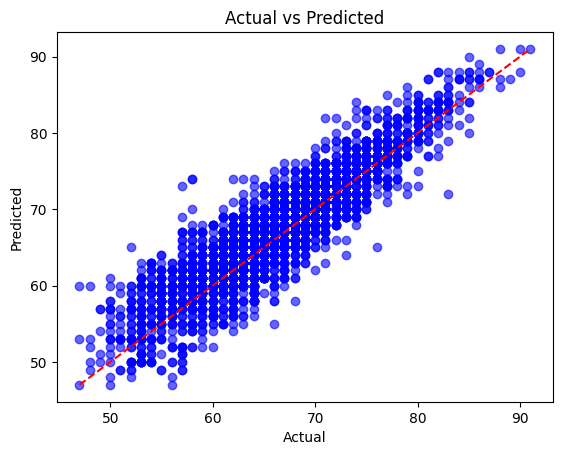

In [153]:
plt.scatter(y_test, pred_test, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

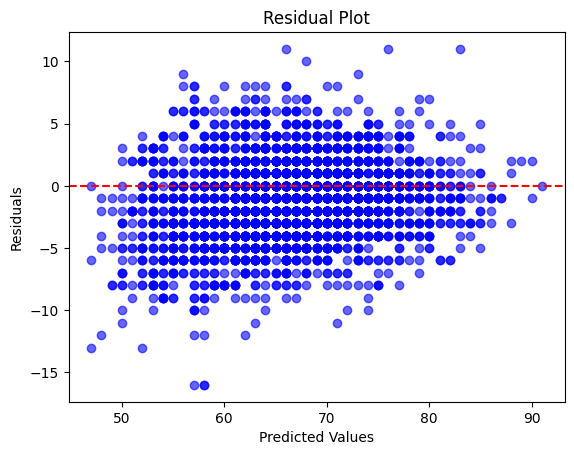

In [154]:
residuals = y_test - pred_test
plt.scatter(y_test, residuals, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

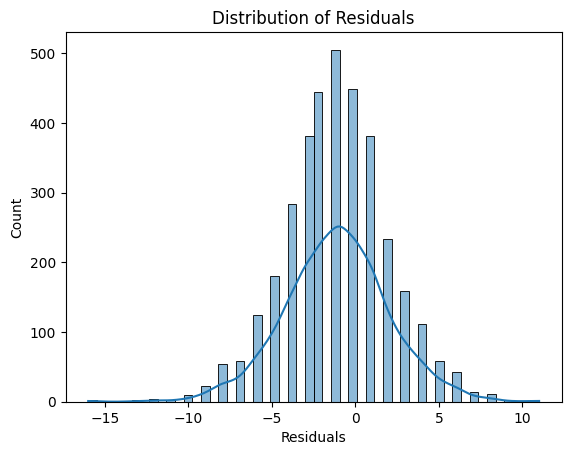

In [155]:
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

In [156]:
residuals_df = pd.DataFrame({'Actual': y_test, 'Predicted': pred_test, 'Residual': residuals})
high_error_cases = residuals_df.sort_values(by='Residual', key=abs, ascending=False).head(10)
print("Top 10 High Error Cases:\n", high_error_cases)

Top 10 High Error Cases:
        Actual  Predicted  Residual
6510       58       74.0     -16.0
6465       58       74.0     -16.0
6193       57       73.0     -16.0
5141       52       65.0     -13.0
4794       47       60.0     -13.0
4837       48       60.0     -12.0
3536       62       74.0     -12.0
4250       58       70.0     -12.0
5970       57       69.0     -12.0
17529      83       72.0      11.0


## 6b. Improving model performance

### Hyperparameter tuning

In [157]:
# Define the parameter grid for the Decision Tree Regressor
param_grid = {        
   'max_depth': [20, 30, 50, 75],                 
   'max_features': [None, "sqrt", "log2"], # restrictions on how many features to split
   'min_samples_leaf': [4, 8, 10, 20], 
   'min_samples_split': [30, 50, 75, 100]
}

GridSearch is used to aid in hyperparameter tuning.

In [158]:
gsc_df = GridSearchCV(
                        estimator=dtr, 
                        param_grid=param_grid,
                        cv=5,
                        scoring="neg_root_mean_squared_error", 
                        verbose=1
                     )

In [159]:
gsc_df.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [20, 30, 50, 75],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [4, 8, 10, 20],
                         'min_samples_split': [30, 50, 75, 100]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [160]:
gsc_df.best_params_

{'max_depth': 50,
 'max_features': None,
 'min_samples_leaf': 20,
 'min_samples_split': 50}

In [161]:
gsc_df.best_score_

-2.617291341462443

Create a Decision Tree Regressor with the best parameters

In [162]:
best_dtr = gsc_df.best_estimator_

Train the estimator on the data:

In [163]:
best_dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=50, min_samples_leaf=20, min_samples_split=50)

Get the predictions, mean squared error, root mean squared error, and R^2 Score.

In [164]:
pred_y_train = best_dtr.predict(X_train)

print(f"Training MSE: {mean_squared_error(pred_y_train, y_train)}")
print(f"Training RMSE: {root_mean_squared_error(pred_y_train, y_train)}")
print(f"R² Score: {r2_score(pred_y_train, y_train)}")

Training MSE: 4.604508767378701
Training RMSE: 2.1458119133276106
R² Score: 0.894495425646541


### Testing phase

In [165]:
pred_y_test = best_dtr.predict(X_test)

print(f"Test MSE: {mean_squared_error(pred_y_test, y_test)}")
print(f"Test RMSE: {root_mean_squared_error(pred_y_test, y_test)}")
print(f"R² Score: {r2_score(pred_y_test, y_test)}")

Test MSE: 8.668942515470217
Test RMSE: 2.944306797103559
R² Score: 0.8080492482846612


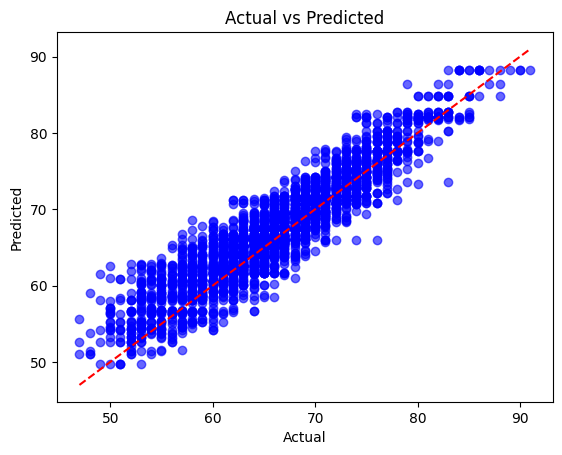

In [166]:
plt.scatter(y_test, pred_y_test, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

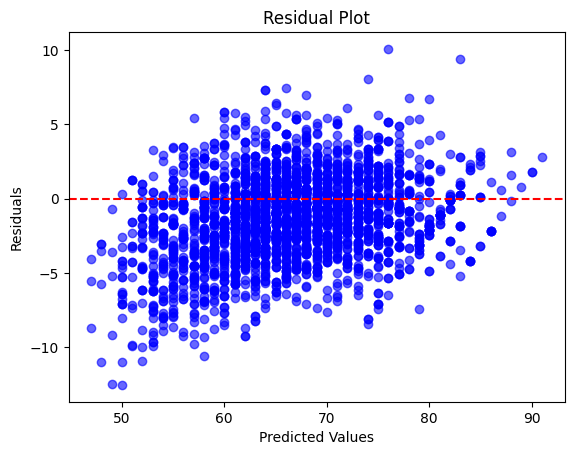

In [167]:
residuals = y_test - pred_y_test
plt.scatter(y_test, residuals, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

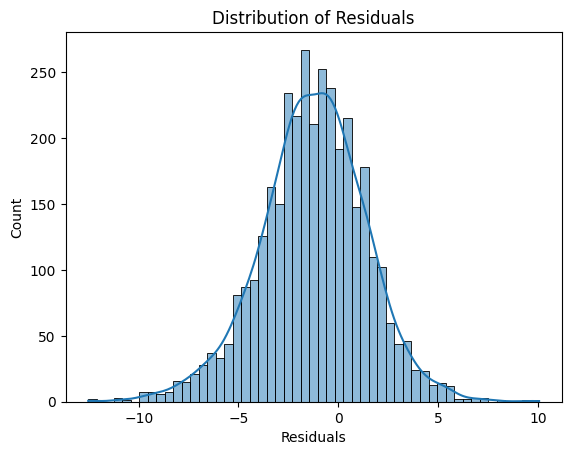

In [168]:
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

In [169]:
residuals_df = pd.DataFrame({'Actual': y_test, 'Predicted': pred_y_test, 'Residual': residuals})
high_error_cases = residuals_df.sort_values(by='Residual', key=abs, ascending=False).head(10)
print("Top 10 High Error Cases:\n", high_error_cases)

Top 10 High Error Cases:
        Actual  Predicted   Residual
4896       50  62.529412 -12.529412
4778       49  61.500000 -12.500000
4914       50  61.000000 -11.000000
4837       48  59.000000 -11.000000
5141       52  62.894737 -10.894737
6510       58  68.571429 -10.571429
16725      76  65.933333  10.066667
5132       52  61.950000  -9.950000
5035       51  60.916667  -9.916667
5304       53  62.894737  -9.894737


# 7. Model 3: Linear Regression

## 7a. Initial model training

In [170]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

### Testing the model without using a ridge or lasso regression

In [171]:
X_train

,age,height_cm,weight_kgs,wage_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),body_type,heading_accuracy,...,CM,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
7315,0.241379,0.666667,0.563923,0.000000,1.0,0.0,0.50,0.00,0.5,0.088889,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2079,0.413793,0.047619,0.460595,0.008811,0.0,0.0,0.25,0.25,0.0,0.611111,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3719,0.137931,0.666667,0.460595,0.000000,0.0,0.0,0.50,0.50,0.5,0.566667,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6764,0.068966,0.428571,0.420315,0.004405,1.0,0.0,0.50,0.25,0.5,0.422222,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12456,0.482759,0.571429,0.420315,0.004405,1.0,0.0,0.50,0.50,1.0,0.722222,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10204,0.275862,0.047619,0.404553,0.004405,1.0,0.0,0.50,0.25,0.0,0.600000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9375,0.034483,0.000000,0.262697,0.004405,0.0,0.0,0.75,0.50,0.0,0.566667,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
7294,0.310345,0.571429,0.563923,0.006608,1.0,0.0,0.50,0.00,0.5,0.155556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7296,0.241379,0.285714,0.404553,0.002203,0.0,0.0,0.50,0.25,0.5,0.444444,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [172]:
y_train

7315     60
2079     67
3719     61
6764     59
12456    68
         ..
10204    65
9375     64
7294     60
7296     60
17678    90
Name: overall_rating, Length: 14153, dtype: int64

In [173]:
lin_reg = LinearRegression()

In [174]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [175]:
y_pred_train = lin_reg.predict(X_train)

In [176]:
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = root_mean_squared_error(y_train, y_pred_train)
print(f'Mean Squared Error: {mse_train}')
print(f'Root Mean Squared Error: {rmse_train}')

Mean Squared Error: 8.28795060174011
Root Mean Squared Error: 2.8788800950612914


In [177]:
y_pred_test = lin_reg.predict(X_test)

In [178]:
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = root_mean_squared_error(y_test, y_pred_test)



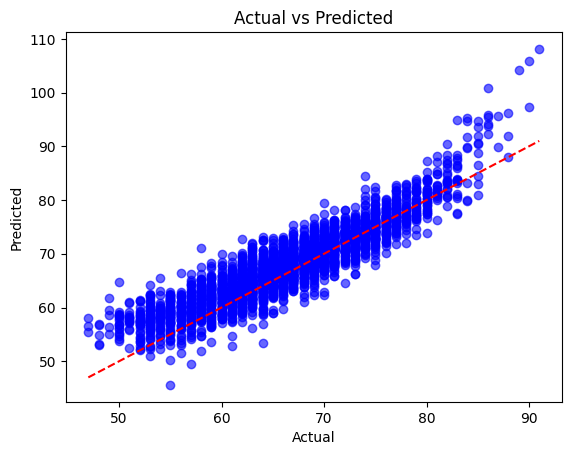

In [179]:
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


In [180]:
r2 = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f'Mean Squared Error (Train): {mse_train}')
print(f'Mean Squared Error (Test): {mse_test}')
print(f'Root Mean Squared Error (Train): {rmse_train}')
print(f'Root Mean Squared Error (Test): {rmse_test}')
print(f'R² Score (Train): {r2}')
print(f'R² Score (Testing): {r2_test}')

Mean Squared Error (Train): 8.28795060174011
Mean Squared Error (Test): 11.067501414889763
Root Mean Squared Error (Train): 2.8788800950612914
Root Mean Squared Error (Test): 3.3267854476791503
R² Score (Train): 0.8282192100960772
R² Score (Testing): 0.7756182764822189


## 7b. Error Analysis

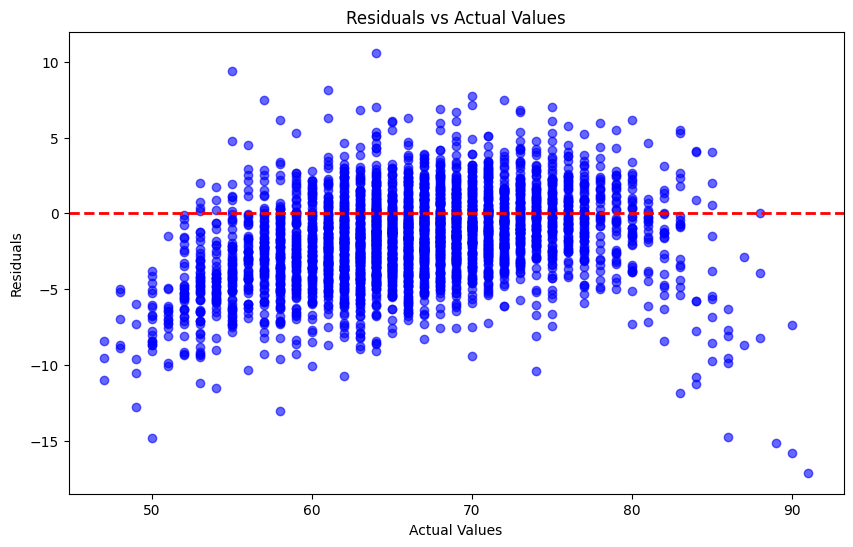

In [181]:
y_pred = lin_reg.predict(X_test)
residuals = y_test - y_pred

# Create a DataFrame to analyze residuals
residuals_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Residual': residuals})

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual Values')
plt.show()

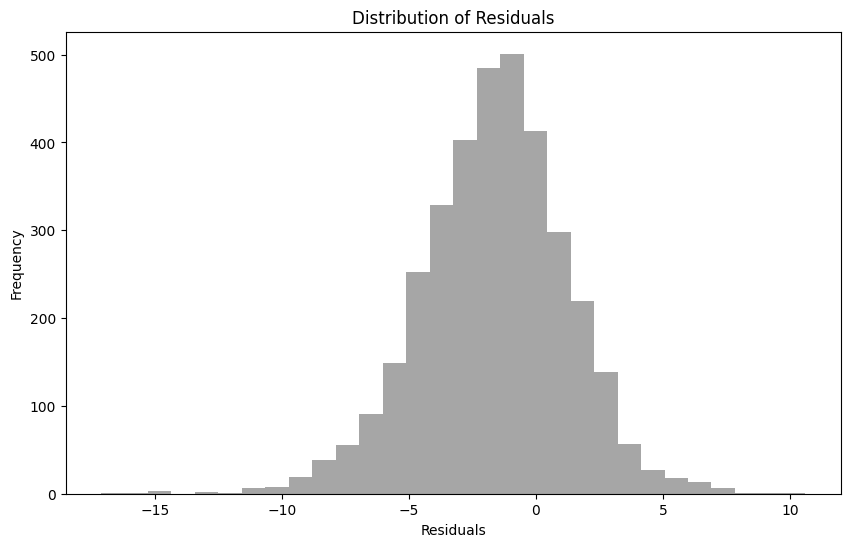

In [182]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='gray', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [183]:
high_error_cases = residuals_df.sort_values(by='Residual', key=abs, ascending=False).head(10)
print("Top 10 High Error Cases:\n", high_error_cases)


Top 10 High Error Cases:
        Actual   Predicted   Residual
17685      91  108.120352 -17.120352
17679      90  105.850455 -15.850455
10         89  104.180512 -15.180512
4896       50   64.796947 -14.796947
17645      86  100.776166 -14.776166
6510       58   71.038032 -13.038032
4776       49   61.775412 -12.775412
54         83   94.858750 -11.858750
5476       54   65.500949 -11.500949
17598      84   95.238116 -11.238116


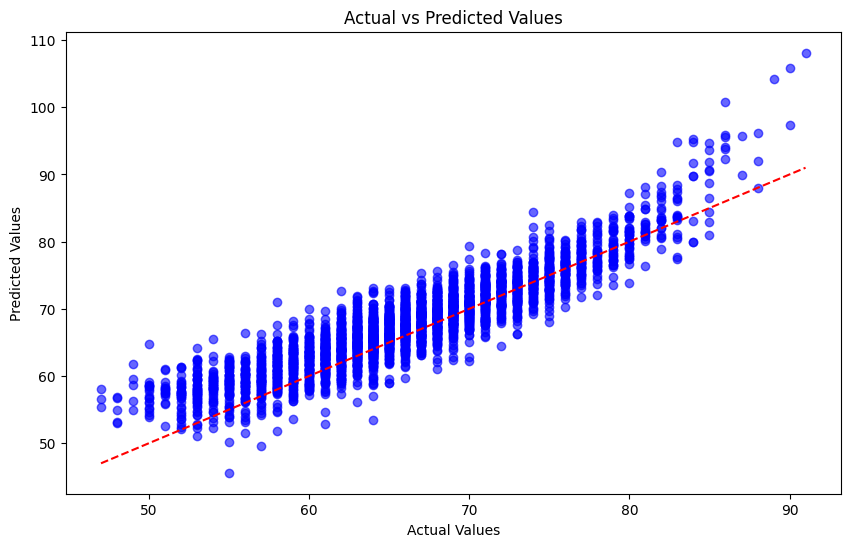

In [184]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


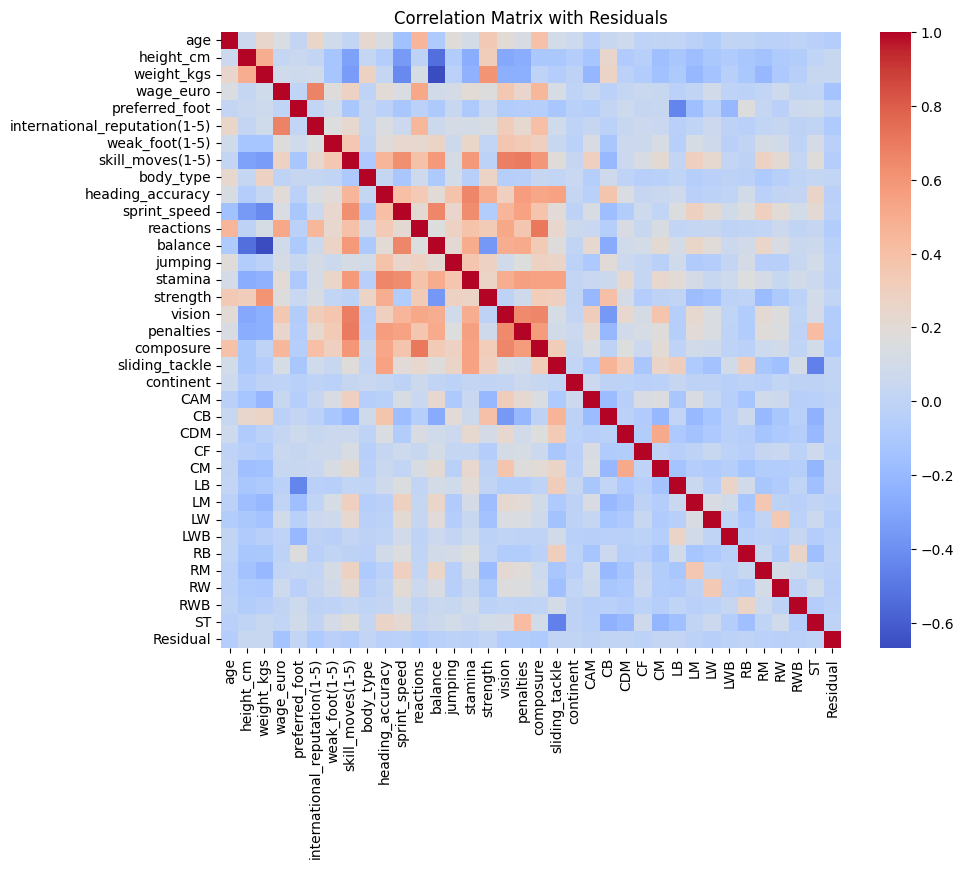

In [185]:
# Compute the correlation matrix
correlation_matrix = pd.concat([X_test, pd.Series(residuals, name='Residual')], axis=1).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix with Residuals")
plt.show()

## 7c. Improving model performance

Using regularization techniques to reduce impact from correlated features

`ridge` regression

Mean Squared Error (Train): 8.290032867228861
Mean Squared Error (Test): 10.983660844525964
Root Mean Squared Error (Train): 2.8792417174021465
Root Mean Squared Error (Test): 3.3141606546041134
R² Score (Train): 0.7773180541441973
R² Score (Testing): 0.7756182764822189


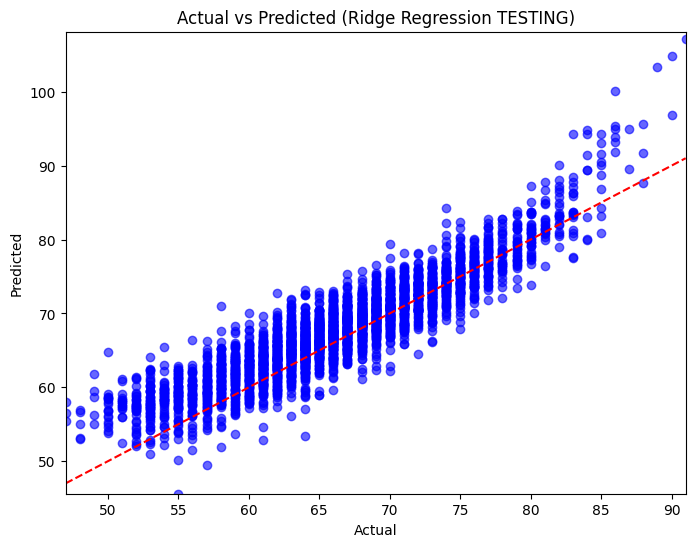

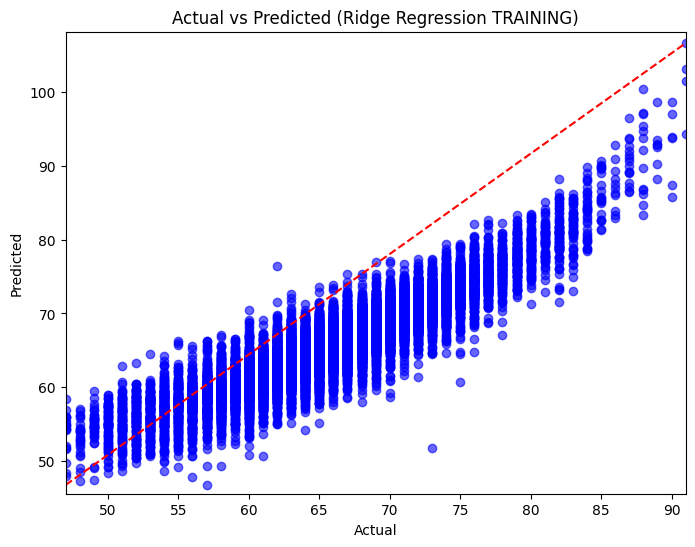

In [186]:
from sklearn.linear_model import Ridge
# Initialize and fit the Ridge regression model
ridge_reg = Ridge(alpha=1.0)  # Adjust alpha for regularization strength
ridge_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_train = ridge_reg.predict(X_train)
y_pred = ridge_reg.predict(X_test)

# Evaluate the model
mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)
rmse_train = root_mean_squared_error(y_train, y_pred_train)
rmse_test = root_mean_squared_error(y_test, y_pred)

# Print performance metrics
print(f'Mean Squared Error (Train): {mse_train}')
print(f'Mean Squared Error (Test): {mse_test}')
print(f'Root Mean Squared Error (Train): {rmse_train}')
print(f'Root Mean Squared Error (Test): {rmse_test}')
print(f'R² Score (Train): {r2}')
print(f'R² Score (Testing): {r2_test}')

# Visualize Actual vs Predicted for Testing
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlim(y_test.min(), y_test.max())  # Set the same range for both axes
plt.ylim(y_pred_test.min(), y_pred_test.max())  # Set the same range for both axes
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Ridge Regression TESTING)')
plt.show()

# Visualize Actual vs Predicted for Training
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_pred_train.min(), y_pred_train.max()], 'r--')  # Perfect prediction line
plt.xlim(y_test.min(), y_test.max())  # Set the same range for both axes
plt.ylim(y_pred_test.min(), y_pred_test.max())  # Set the same range for both axes
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Ridge Regression TRAINING)')
plt.show()


In [187]:
print("Feature Coefficients:", ridge_reg.coef_)

Feature Coefficients: [ 2.45894657e+00  7.37648147e-01  2.16619160e+00  2.17538897e+01
 -3.24089756e-01  1.50548048e+00  6.53663488e-01  3.58298345e+00
  9.81899937e-02 -2.18863927e+00  2.02702102e+00  2.60172272e+01
 -2.34076027e+00  2.06292178e+00  1.17309920e-01  2.79423846e+00
  3.41653718e+00 -1.55383941e+00  1.01943991e+01 -4.14162599e-01
  8.29997091e-01  3.43231680e-02  3.02361300e-01 -1.49368661e-01
 -3.29884777e-01 -1.71750099e+00 -9.82312114e-01  1.18659548e-01
  2.31853181e-01 -1.08227030e-01 -6.35385192e-01 -2.79153568e-03
  8.21741222e-02  1.73780063e-01 -1.45832932e+00]


`lasso` regression

Mean Squared Error (Train): 48.247
Mean Squared Error (Test): 49.332
Root Mean Squared Error (Train): 6.946
Root Mean Squared Error (Test): 7.024
R² Score (Train): 0.000
R² Score (Test): -0.000


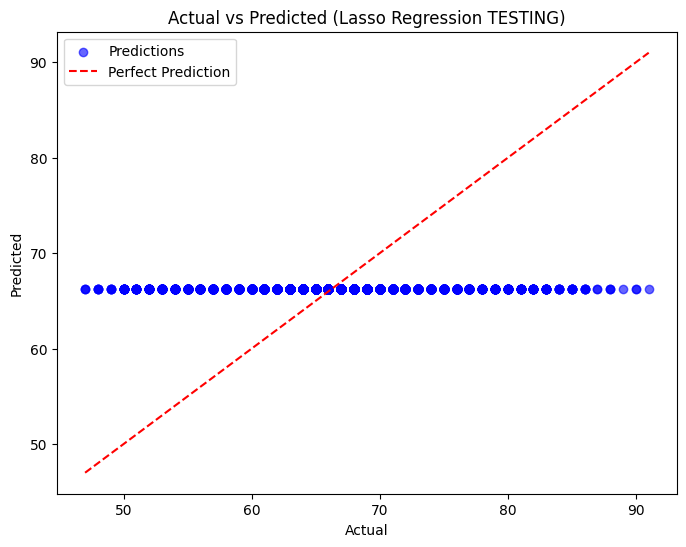

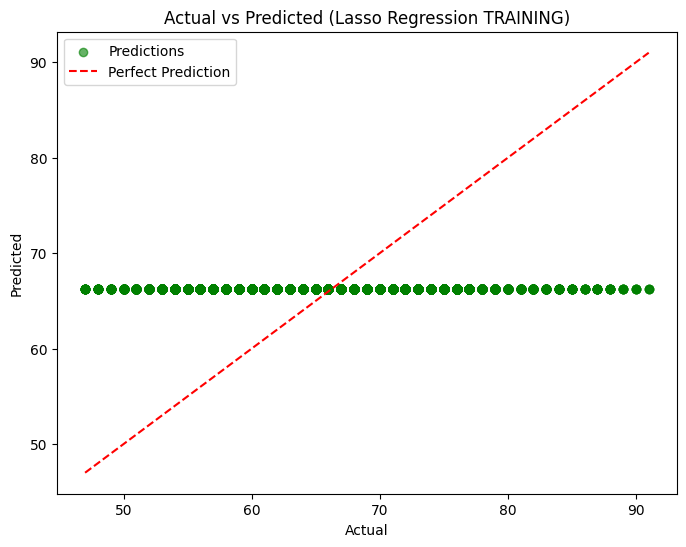

In [188]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize and fit the Lasso regression model
lasso_reg = Lasso(alpha=1.0)  
lasso_reg.fit(X_train, y_train)

# Predict on the training and test sets
y_pred_train = lasso_reg.predict(X_train)
y_pred = lasso_reg.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred)

# Print performance metrics
print(f'Mean Squared Error (Train): {mse_train:.3f}')
print(f'Mean Squared Error (Test): {mse_test:.3f}')
print(f'Root Mean Squared Error (Train): {rmse_train:.3f}')
print(f'Root Mean Squared Error (Test): {rmse_test:.3f}')
print(f'R² Score (Train): {r2_train:.3f}')
print(f'R² Score (Test): {r2_test:.3f}')

# Visualize Actual vs Predicted (Testing)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Lasso Regression TESTING)')
plt.legend()
plt.show()

# Visualize Actual vs Predicted (Training)
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, color='green', alpha=0.6, label="Predictions")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label="Perfect Prediction")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Lasso Regression TRAINING)')
plt.legend()
plt.show()


### Hyperparameter tuning

Using a gridsearch to determine the best regularization technique and its best alpha

In [189]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer


# Define the parameter grid for Ridge and Lasso
param_grid = {
    "alpha": [0.01, 0.1, 1, 10, 100]  # Range of regularization strengths
}

# Create Ridge and Lasso regressors
ridge = Ridge()
lasso = Lasso()

# Use MSE as the scoring metric
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform Grid Search for Ridge
ridge_grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring=mse_scorer, cv=5)
ridge_grid_search.fit(X_train, y_train)

# Perform Grid Search for Lasso
lasso_grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring=mse_scorer, cv=5)
lasso_grid_search.fit(X_train, y_train)

# Extract best models and parameters
best_ridge = ridge_grid_search.best_estimator_
best_lasso = lasso_grid_search.best_estimator_
best_ridge_params = ridge_grid_search.best_params_
best_lasso_params = lasso_grid_search.best_params_

# Evaluate both models on the test set
ridge_y_pred = best_ridge.predict(X_test)
lasso_y_pred = best_lasso.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)

# Print results
print("Ridge Regression:")
print(f"Best Parameters: {best_ridge_params}")
print(f"Test MSE: {ridge_mse:.3f}")

print("\nLasso Regression:")
print(f"Best Parameters: {best_lasso_params}")
print(f"Test MSE: {lasso_mse:.3f}")

# Select the best model
if ridge_mse < lasso_mse:
    print("\nBest Model: Ridge")
    best_model = best_ridge
else:
    print("\nBest Model: Lasso")
    best_model = best_lasso

# Final metrics for the best model
final_y_pred = best_model.predict(X_test)
final_rmse = np.sqrt(mean_squared_error(y_test, final_y_pred))
final_r2 = best_model.score(X_test, y_test)

print(f"Final Model Performance on Test Set:")
print(f"RMSE: {final_rmse:.3f}")
print(f"R²: {final_r2:.3f}")



Ridge Regression:
Best Parameters: {'alpha': 0.1}
Test MSE: 11.058

Lasso Regression:
Best Parameters: {'alpha': 0.01}
Test MSE: 11.109

Best Model: Ridge
Final Model Performance on Test Set:
RMSE: 3.325
R²: 0.776


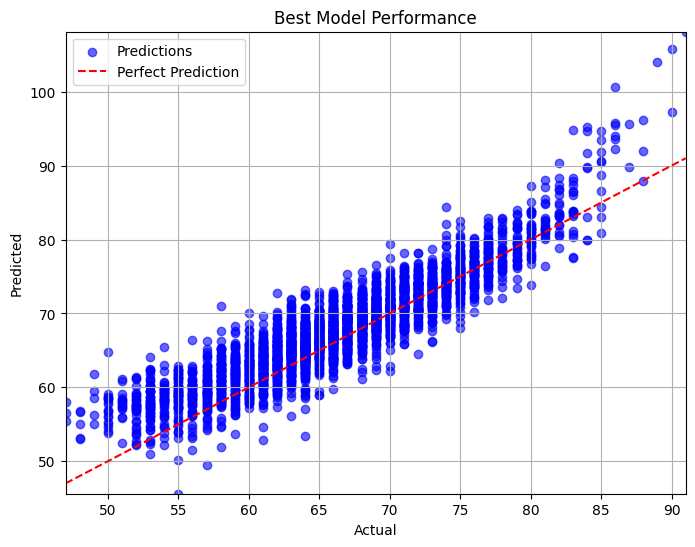

In [190]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, final_y_pred, color='blue', alpha=0.6, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Best Model Performance')
plt.xlim(y_test.min(), y_test.max())  # Set the same range for both axes
plt.ylim(y_pred_test.min(), y_pred_test.max())  # Set the same range for both axes
plt.grid(True)  # Add grid lines for better visual interpretation
plt.legend()
plt.show()


Features with respect to their coefficients

In [191]:
coef = best_model.coef_
vals = []

# Create a list of feature and coefficient pairs
for f, c in zip(X_train.columns, best_model.coef_):
    vals.append((f, c))

# Sort the list by the coefficient value (c)
vals_sorted = sorted(vals, key=lambda x: x[1], reverse=True)

# Create a formatted list with feature names and coefficients
vals_sorted_formatted = [f"Feature {f}: {c}" for f, c in vals_sorted]

# Print the sorted list
for item in vals_sorted_formatted:
    print(item)


Feature reactions: 26.062387018195835
Feature wage_euro: 22.95305219100965
Feature composure: 10.179294383404795
Feature skill_moves(1-5): 3.5722292332775925
Feature vision: 3.365077357346182
Feature strength: 2.7821054925311857
Feature age: 2.4780063728795234
Feature weight_kgs: 2.1484948685500256
Feature jumping: 2.0532090104398044
Feature sprint_speed: 2.0376321816294407
Feature international_reputation(1-5): 1.1533169302898691
Feature continent: 0.8240827502509225
Feature height_cm: 0.7266758421561768
Feature weak_foot(1-5): 0.6467156739298815
Feature CB: 0.3106454664025177
Feature LW: 0.23028677918047163
Feature RWB: 0.17677191939451478
Feature LM: 0.12240371574136034
Feature body_type: 0.1001528791714811
Feature stamina: 0.09885174310965075
Feature RW: 0.07978644374730495
Feature CAM: 0.042300137829576104
Feature RM: 0.0016735701567847918
Feature LWB: -0.10642494748232657
Feature CDM: -0.1405519220379879
Feature preferred_foot: -0.32450770686507746
Feature CF: -0.3330128077372234